### Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнил студент гр. 9382 Поплавский Иван, вариант 29

### Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t -> + \infty$. 

### Основные теоретические положения

Линейная однородная система с периодическими коэффициентами - это система ОЛДУ следующего вида:

$$X' = A(t)X,\ A(t + T) = A(t), t \ge 0$$ 

Матрица $\Phi(t) = \{\phi_{ij}, i, j = 1, 2, ..., n \}$ называется фундаментальной матрицей системы , если все её столбцы являются линейно независимыми решениями этой системы.

Матрица $C$, удовлетворяющая условию $\Phi(t + T) = \Phi(t)C, \forall t \ge 0$, называется основной для фундаментальной матрицы $\Phi(t)$.

Спектральным радиусом матрицы $A$ называется максимум модуля её собственных чисел: $\rho(A) = max|\lambda_j|, 0 \le j \le n$

### Постановка задачи

Дано дифференциальное уравнение:

$$ x'' + a(p,t)x = 0, \;\; a(p,t) = p + b(t), \;\; b(t + T) = b(t), $$

где $p$ - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$$
\begin{cases}
    u'_1 = u_2, \\
    u'_2 = -a(p,t)u_1;
\end{cases}
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1)
$$

Здесь $u_1(t) = x(t), \; u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида $(1)$.

### Выполнение работы 

$$Вариант 29: 1/(2 + sin 2t)$$

При решении алгоритм проходит массив значений параметра p из промежутка [0, 10] с шагом 0.001 по всем значениям. Для каждого параметра p будет найден спектральный радиус основной матрицы, как наибольшее по модулю собственное число основной матрицы.

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline

def func(p, t):
    return p + 1/(2 + np.sin(2 * t))

p_val = np.arange(0, 10, 0.001)

interval = (0, pi)
v_1 = (1, 0)
v_2 = (0, 1)
sr = []

for p in p_val:
    # Cначала находится фундаментальная матрица, потом находится основная матриц и ее спектральный радиус
    de_system_func = lambda t, val: [val[1], -func(p, t) * val[0]]
    # Столбцы фундаментальной матрицы
    u1 = solve_ivp(de_system_func, interval, v_1)
    u2 = solve_ivp(de_system_func, interval, v_2)
    # Основная матрица
    c = array([[u1.y[0][-1], u2.y[0][-1]],
               [u1.y[1][-1], u2.y[1][-1]]])
    # Спектральный радиус
    sr.append(max(abs(np.linalg.eigvals(c))))

# Определение точки p0
for i in range(1, len(sr)):
    if sr_values[-i] > 1:
        p0 = p_values[-i + 1]
        break

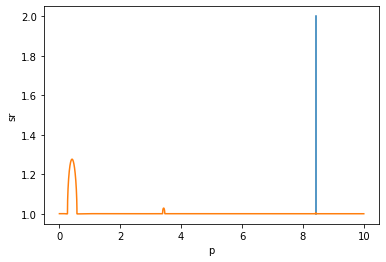

In [80]:
plt.xlabel("p")
plt.ylabel("sr")
plt.plot([p0, p0], [1, 2])
plt.plot(p_values, sr)

In [81]:
print(f"{p0=}")

p0=8.43


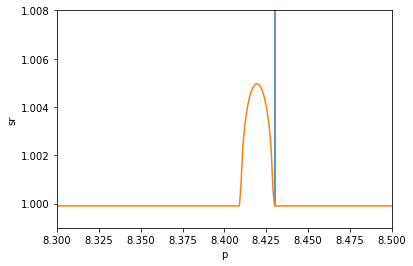

In [82]:
plt.xlabel("p")
plt.ylabel("sr")
plt.xlim(8.3, 8.5)
plt.ylim(0.999, 1.008)
plt.plot([p0, p0], [1, 2])
plt.plot(p_values, sr)

В ходе работы ОЛДУ с периодическими коэффициентами исследовано на устойчивость. Найдена граница между зонами устойчивости и неустойчивости p0 = 8.43, при большем значии система является устойчивой, при меньшим система является неустойчивой